
# Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


# Search Dataset from Kaggle

In [2]:
!kaggle datasets list -s 'iris.csv'

ref                               title                  size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------  --------------------  -----  -------------------  -------------  ---------  ---------------  
saurabh00007/iriscsv              Iris.csv                1KB  2017-11-09 07:34:35          76383        136  0.4117647        
himanshunakrani/iris-dataset      Iris dataset          1006B  2022-07-20 18:50:06           6083         50  1.0              
nileshthonte/iriscsv              iris.csv              1010B  2023-05-27 10:21:16             16         14  0.29411766       
aerospacer/iriscsv                iris.csv               998B  2022-01-02 21:12:57            234          6  0.29411766       
devvinit/iriscsv                  iris.csv                1KB  2018-11-22 10:43:24            254          4  0.4117647        
barkhaverma/iriscsv               iris.csv                1KB  2020-09-01 11:28:41             77       

# Download the dataset

In [3]:
!kaggle datasets download -d "saurabh00007/iriscsv"

iriscsv.zip: Skipping, found more recently modified local copy (use --force to force download)


# Unzipping the dataset

In [4]:
import zipfile

In [5]:
with zipfile.ZipFile("iriscsv.zip","r") as file:
    file.extractall("iris")

In [6]:
import os

In [7]:
os.listdir("iris")

['Iris.csv']

# Read the dataset

In [8]:
df=pd.read_csv('iris/Iris.csv')

In [9]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
#checking shape
df.shape

(150, 6)

In [11]:
#checking the datatypes
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [12]:
#checking if there are empty spaces present in dataframe
df.isin([' ']).sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

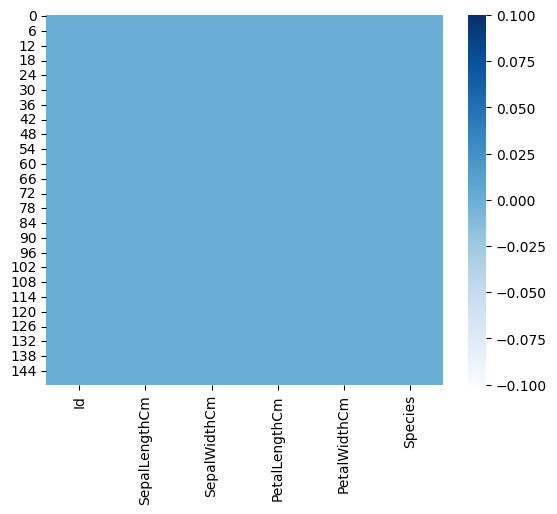

In [13]:
#data visualisation
sns.heatmap(df.isnull(),cmap='Blues')

In [14]:
# Checking Duplicates
df.duplicated().sum()

0

# Exploratory Data Analysis:

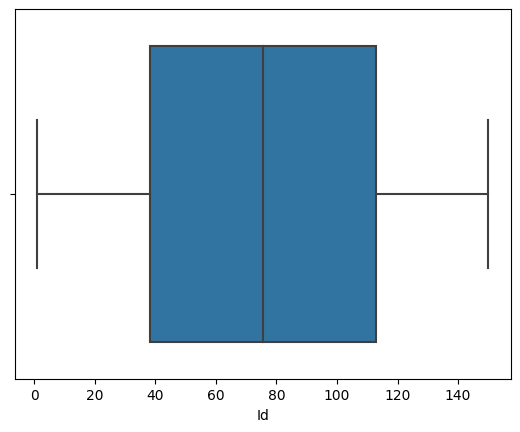

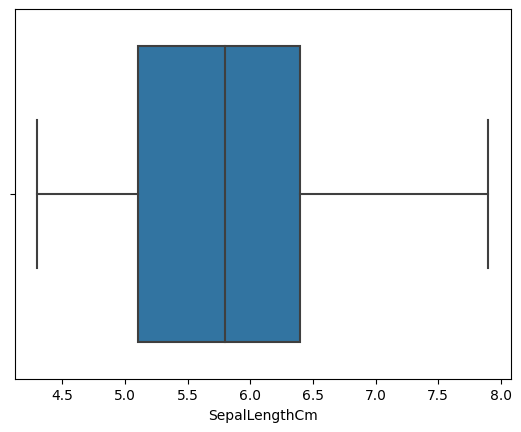

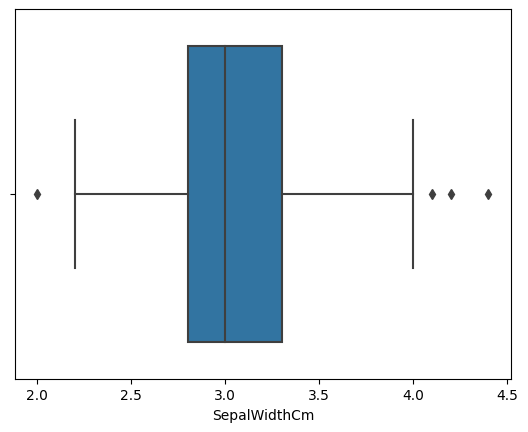

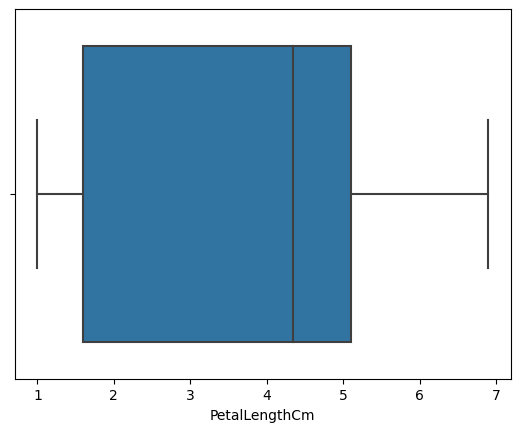

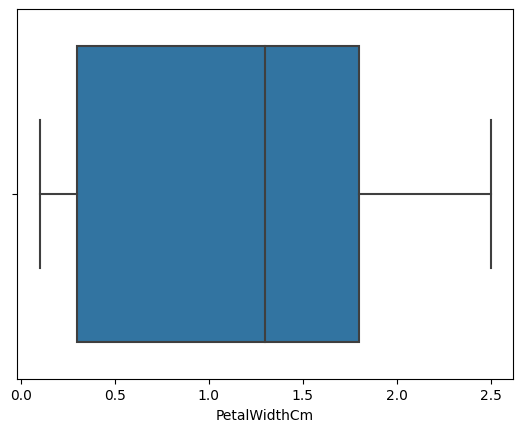

In [15]:
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        sns.boxplot(x=i,data=df)
        plt.show()    

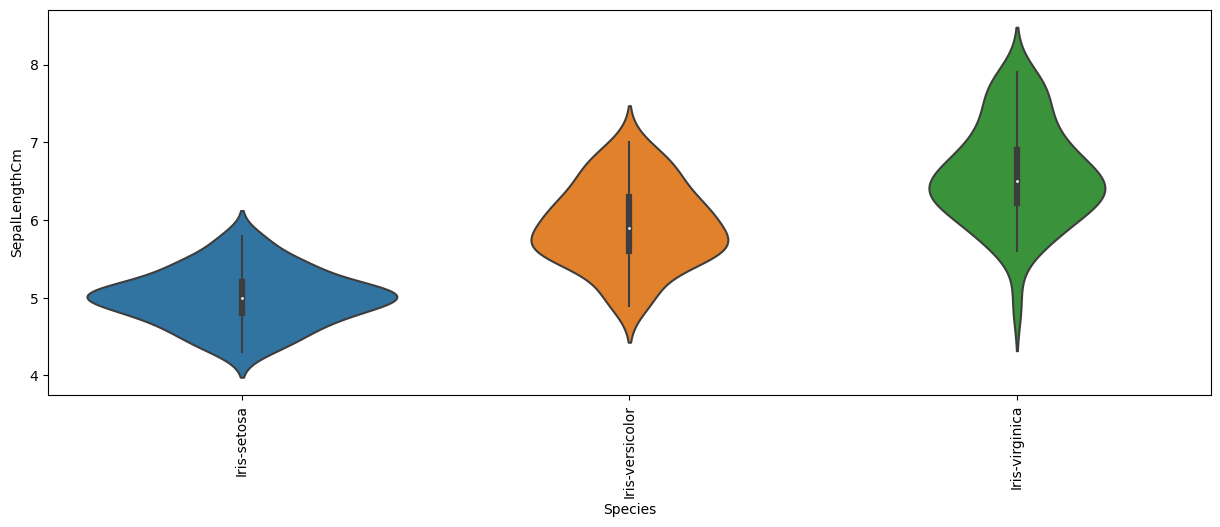

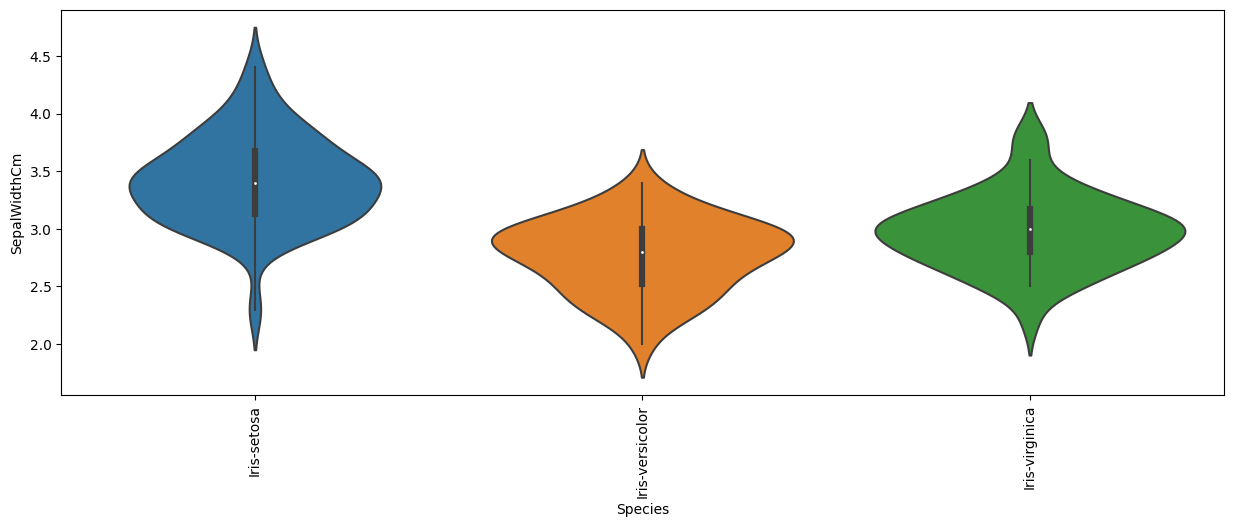

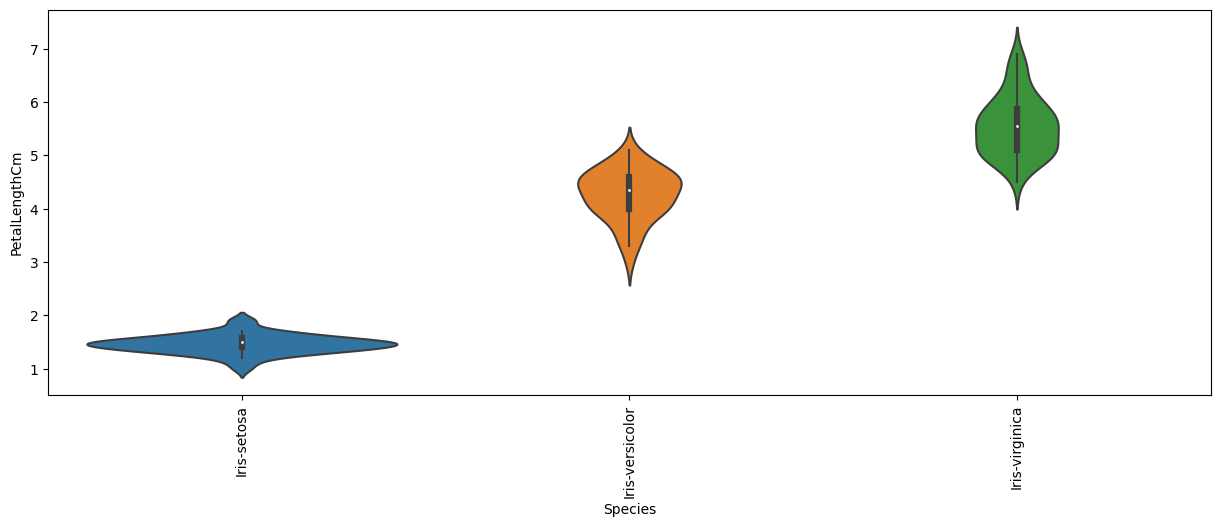

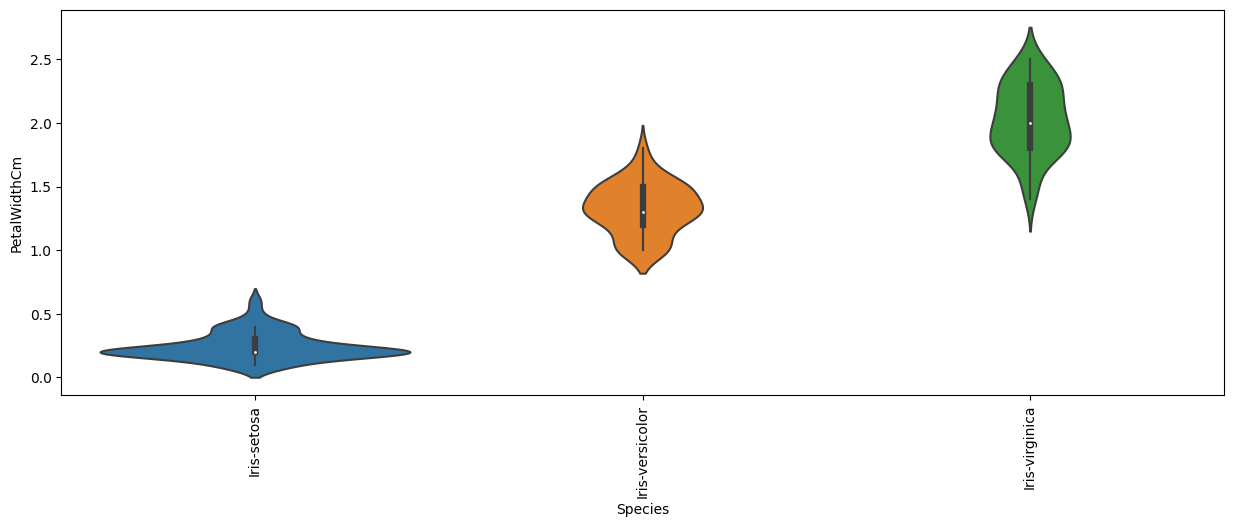

In [16]:
num=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for i in num:
        plt.figure(figsize=(15,5))
        plt.xticks(rotation=90)
        sns.violinplot(y=i,x='Species',data=df)
        plt.show()

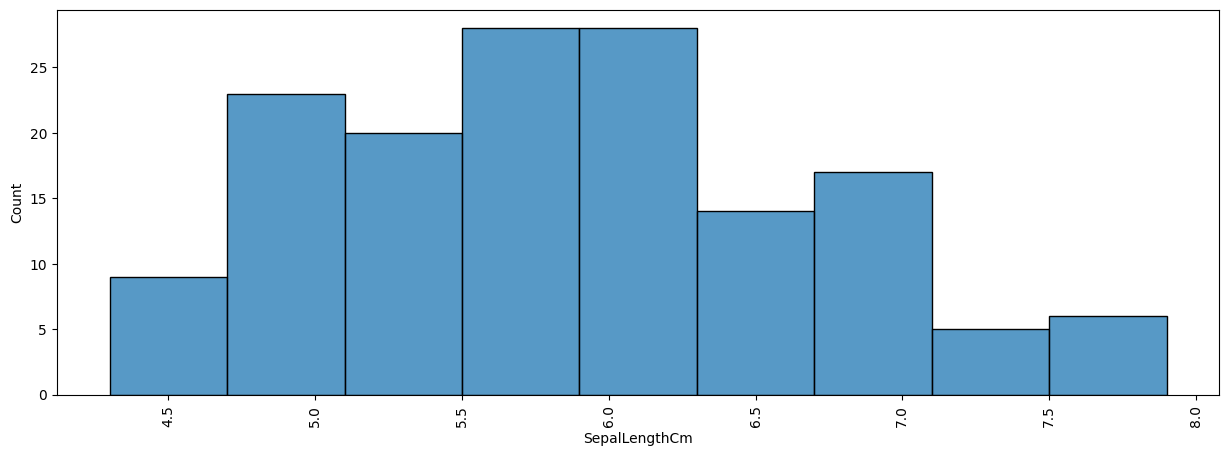

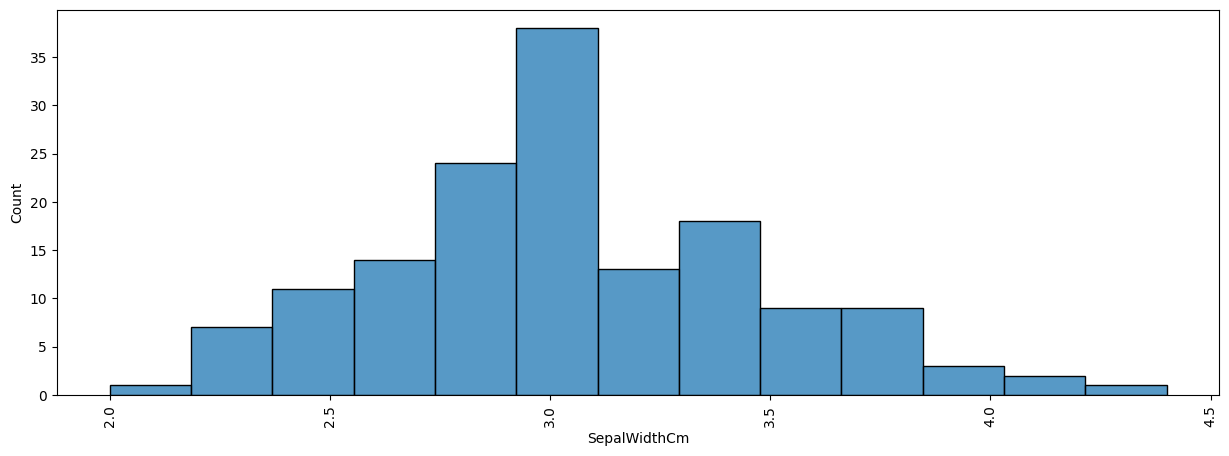

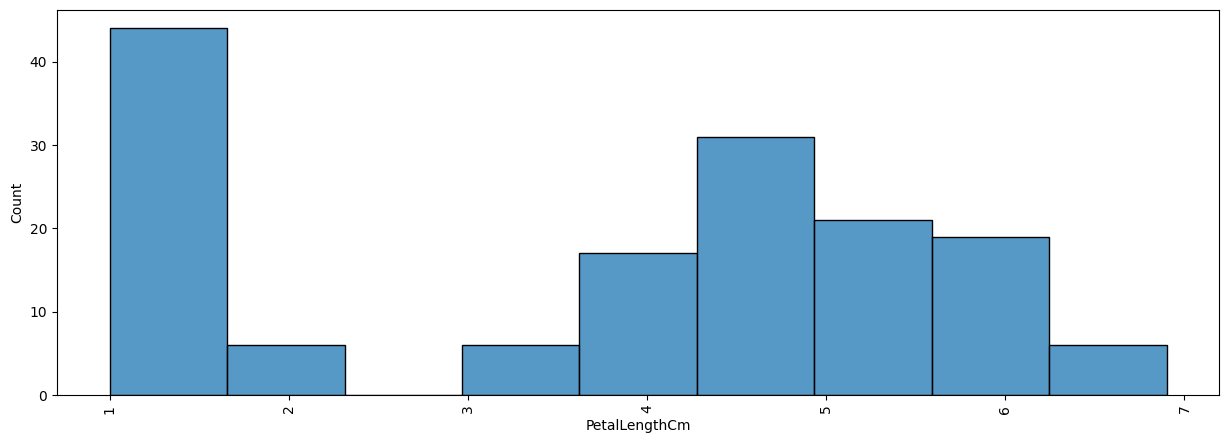

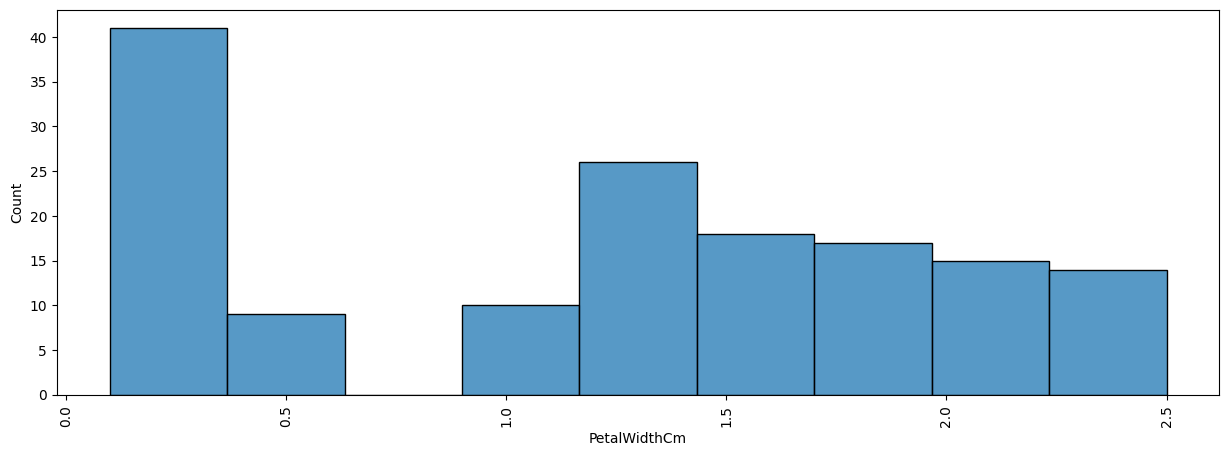

In [17]:
num=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for i in num:
        plt.figure(figsize=(15,5))
        plt.xticks(rotation=90)
        sns.histplot(x=i,data=df)
        plt.show()

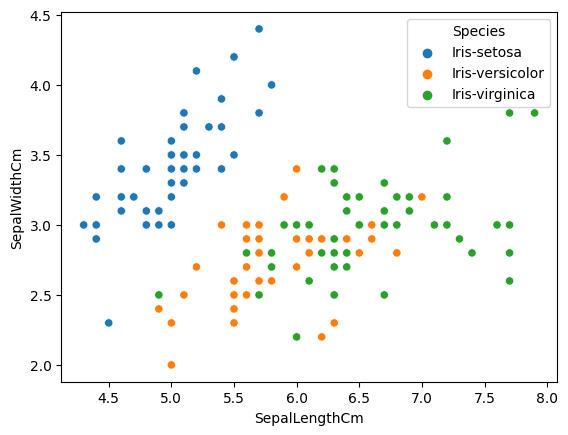

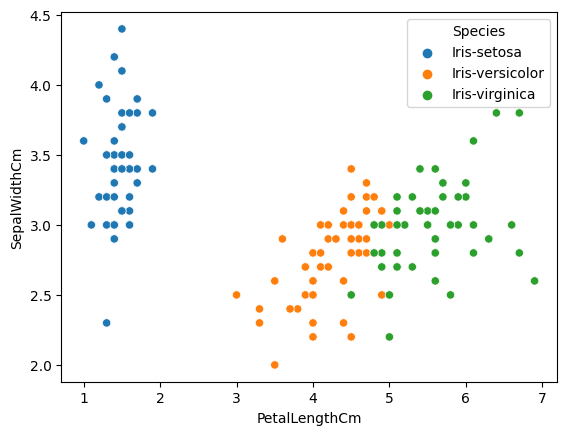

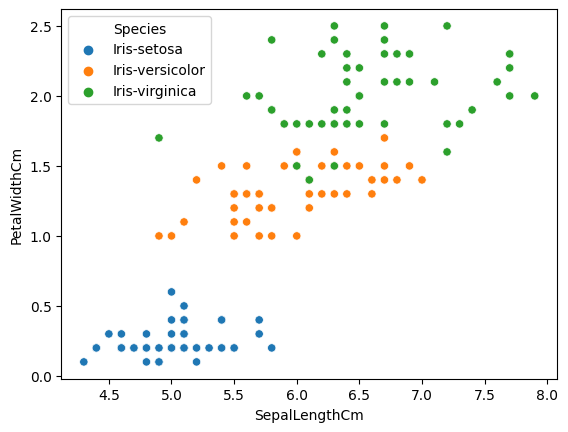

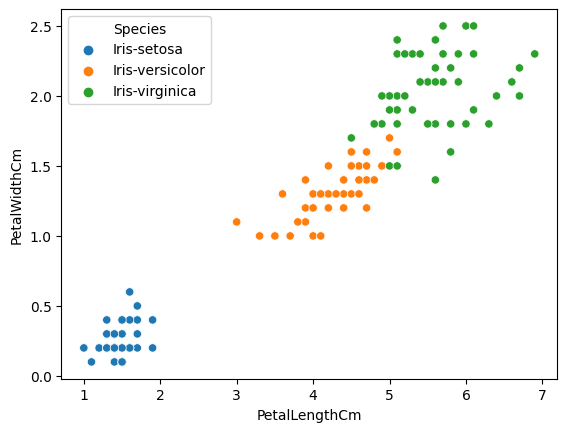

In [18]:
width=['SepalWidthCm','PetalWidthCm']
length=['SepalLengthCm','PetalLengthCm']
for i in width:
    for j in length:
        sns.scatterplot(y=i,x=j,data=df,hue='Species')
        plt.show()

# Data Set Description

In [19]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


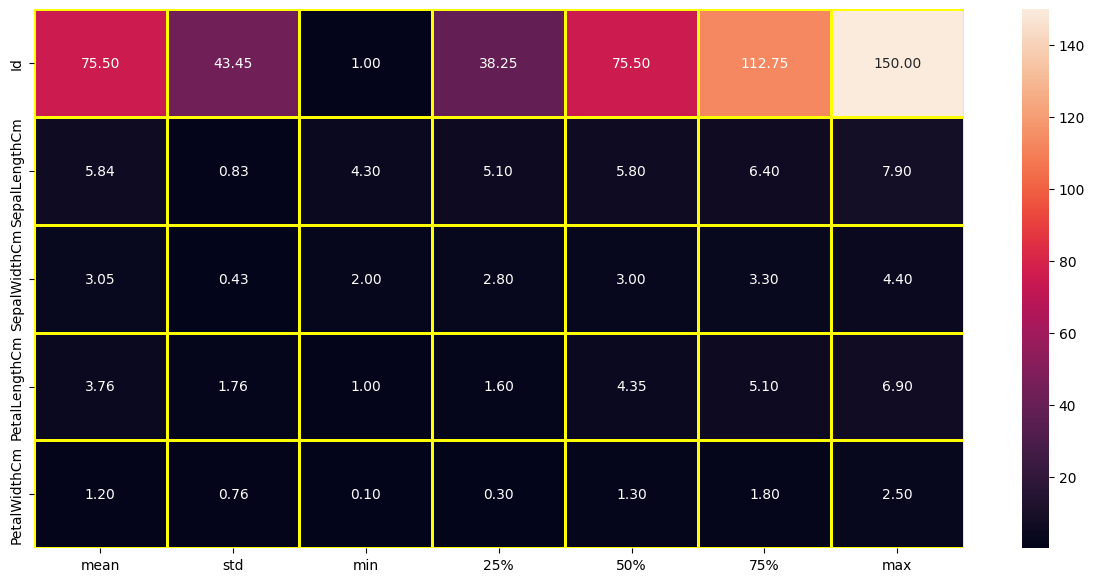

In [20]:
#visualisation
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidth=1,linecolor='yellow',fmt='.2f')
plt.show()

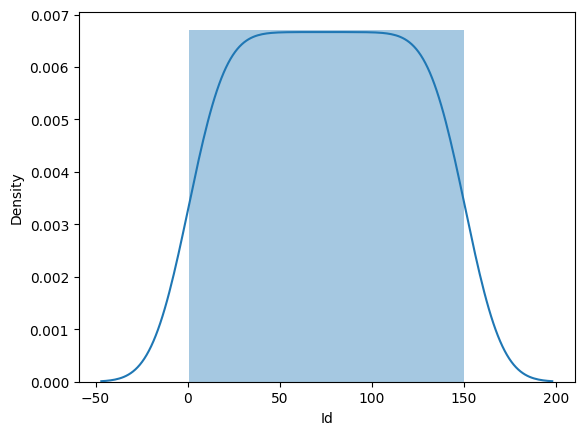

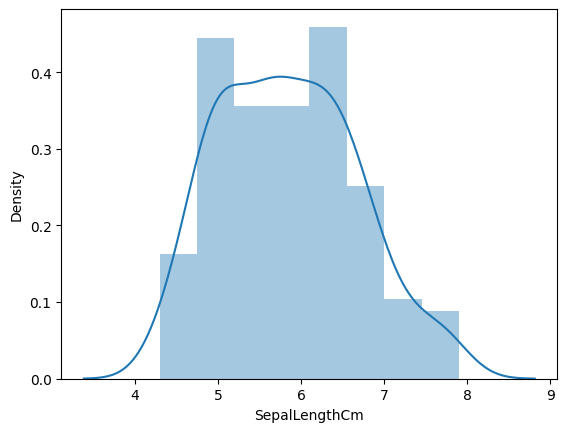

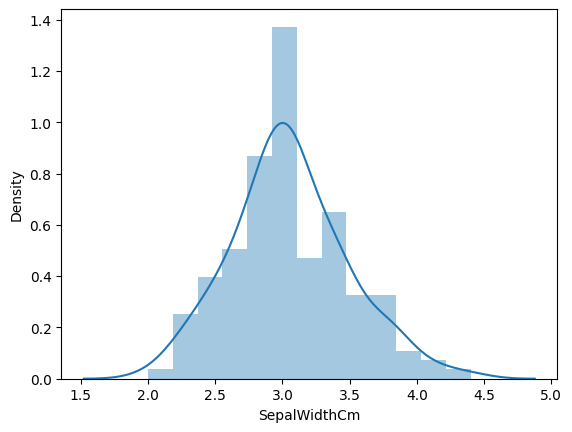

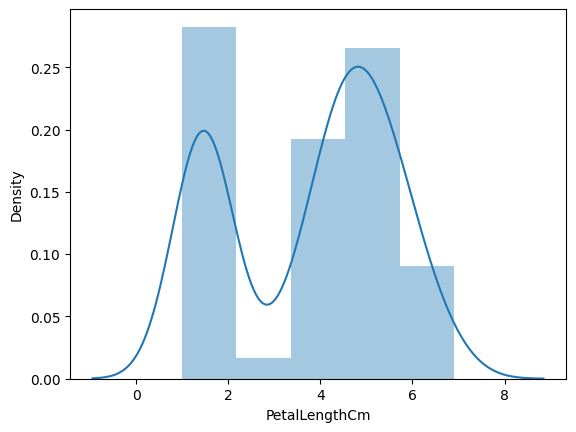

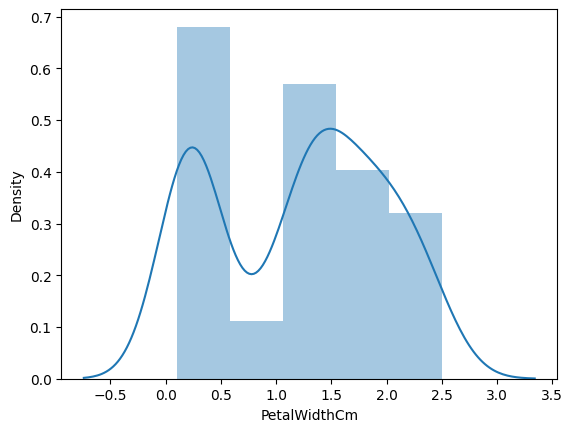

In [21]:
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        sns.distplot(df[i])
        plt.show()

# Data Preprocessing

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [23]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
131,132,7.9,3.8,6.4,2.0,2
68,69,6.2,2.2,4.5,1.5,1
97,98,6.2,2.9,4.3,1.3,1
28,29,5.2,3.4,1.4,0.2,0
58,59,6.6,2.9,4.6,1.3,1


# Now the given problem is a classification problem.. Thus we will be using the classification algorithms to build a model.

attributes-- In the following dataset, the attributes are the petal and sepal length and width. It is also known as Features.


target-- Here the target variables are the 3 flower species.

In [24]:
#attributes
x=df.drop(['Species'],axis=1)
#target
y=df['Species']

# Model Building:

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('Training Accuracy Score is:',round(accuracy_score(y_train,pred_train)*100,1))
        print('Testing Accuracy Score is:',round(accuracy_score(y_test,pred_test)*100,1))
        print('\n')

At random state 0 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 1 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 2 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 3 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 4 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 5 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 6 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 7 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 8 The model performs very well
Training Accuracy Score i

At random state 75 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 76 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 79 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 80 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 81 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 82 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 83 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 84 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 85 The model performs very well
Training Accurac

At random state 155 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 156 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 157 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 158 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 159 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 160 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 162 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 163 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 164 The model performs very well
Trainin

At random state 237 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 238 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 239 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 240 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 241 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 242 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 243 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 244 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 245 The model performs very well
Trainin

At random state 314 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 315 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 316 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 317 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 318 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 319 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 320 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 321 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 322 The model performs very well
Trainin

At random state 390 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 391 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 392 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 393 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 394 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 396 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 397 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 398 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 399 The model performs very well
Trainin

At random state 470 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 471 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 472 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 473 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 474 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 475 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 476 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 477 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 478 The model performs very well
Trainin

At random state 550 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 552 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 553 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 554 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 556 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 557 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 558 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 559 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 560 The model performs very well
Trainin

At random state 629 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 630 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 631 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 632 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 633 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 634 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 635 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 637 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 638 The model performs very well
Trainin

At random state 710 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 711 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 712 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 713 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 714 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 715 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 716 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 717 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 719 The model performs very well
Trainin

At random state 789 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 791 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 792 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 793 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 794 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 795 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 796 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 797 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 798 The model performs very well
Trainin

At random state 869 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 870 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 871 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 872 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 873 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 874 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 875 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 876 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 877 The model performs very well
Trainin

At random state 951 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 952 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 953 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 954 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 955 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 956 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 957 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 958 The model performs very well
Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


At random state 959 The model performs very well
Trainin

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Logistic Regression Model

In [27]:
#selecting random state=5
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=5,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print('Training Accuracy Score is:',round(accuracy_score(y_train,pred_train)*100,1))
print('Testing Accuracy Score is:',round(accuracy_score(y_test,pred_test)*100,1))

Training Accuracy Score is: 100.0
Testing Accuracy Score is: 100.0


# CROSS VALIDATION OF THE MODEL

In [28]:
from sklearn.model_selection import cross_val_score
for k in range(2,15):
    cv_score=cross_val_score(lr,x,y,cv=k)
    cv_mean=cv_score.mean()
    print('At crossfold=',k,'the cv score is',cv_mean)
    print('training score :',accuracy_score(y_train,pred_train))
    print('testing score :',accuracy_score(y_test,pred_test))
    print('\n')

At crossfold= 2 the cv score is 0.7333333333333334
training score : 1.0
testing score : 1.0


At crossfold= 3 the cv score is 0.86
training score : 1.0
testing score : 1.0


At crossfold= 4 the cv score is 0.9066500711237554
training score : 1.0
testing score : 1.0


At crossfold= 5 the cv score is 0.9266666666666667
training score : 1.0
testing score : 1.0


At crossfold= 6 the cv score is 0.9666666666666667
training score : 1.0
testing score : 1.0


At crossfold= 7 the cv score is 0.945887445887446
training score : 1.0
testing score : 1.0


At crossfold= 8 the cv score is 0.9861111111111112
training score : 1.0
testing score : 1.0


At crossfold= 9 the cv score is 1.0
training score : 1.0
testing score : 1.0


At crossfold= 10 the cv score is 0.9933333333333334
training score : 1.0
testing score : 1.0


At crossfold= 11 the cv score is 0.9730269730269732
training score : 1.0
testing score : 1.0


At crossfold= 12 the cv score is 0.9861111111111112
training score : 1.0
testing score :

In [29]:
#selecting cv=9 as it is very close to testing score
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
for i in model:
    i.fit(x_train,y_train)
    ipred=i.predict(x_test)
    i.score(x_train,y_train)
    print(i)
    print('accuracy score:',accuracy_score(y_test,ipred))
    cv_score=cross_val_score(i,x,y,cv=9)
    cv_mean=cv_score.mean()
    print('the cv score is',cv_mean)
    print(confusion_matrix(y_test,ipred))
    print(classification_report(y_test,ipred))
    print('\n')

LogisticRegression()
accuracy score: 1.0
the cv score is 1.0
[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



DecisionTreeClassifier()
accuracy score: 1.0
the cv score is 0.9595588235294118
[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



KNeighborsClassifie

# CONCLUSION:

Selecting logistic regression as our final model as the model is performing extremely well having cv score and testing score almost equal.

In [35]:
lrpred=lr.predict(x_test)

In [36]:
original=np.array(y_test)
predicted=np.array(lrpred)
df_com=pd.DataFrame({'Original':original,'Predicted':predicted},index=range(len(original)))
df_com

,Original,Predicted
0,1,1
1,2,2
2,2,2
3,0,0
4,2,2
5,1,1
6,0,0
7,1,1
8,0,0
9,1,1
